In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [94]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [95]:
train.head(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [96]:
test.head(5)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [97]:
train.shape # 785 is the number of pixels whereas 42000 is number of diff images of diff integers

(42000, 785)

<function matplotlib.pyplot.show(close=None, block=None)>

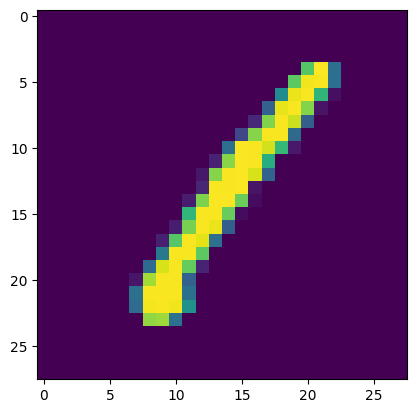

In [98]:
 # converting an array into a image
import matplotlib.pyplot as plt
num = np.array(train.iloc[0,1:]).reshape(28,28)
plt.imshow(num)
plt.show

**This is how we create a image through an array**

<function matplotlib.pyplot.show(close=None, block=None)>

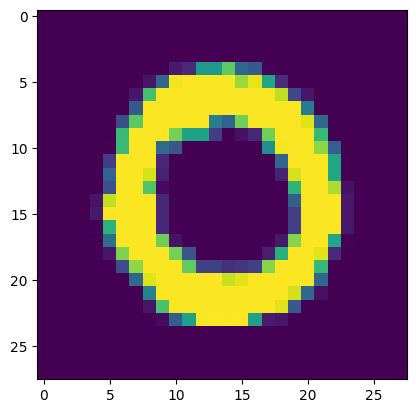

In [99]:
num = np.array(train.iloc[1,1:]).reshape(28,28)
plt.imshow(num)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

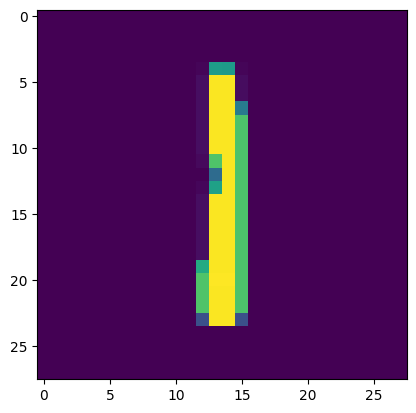

In [100]:
num = np.array(train.iloc[2,1:]).reshape(28,28)
plt.imshow(num)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

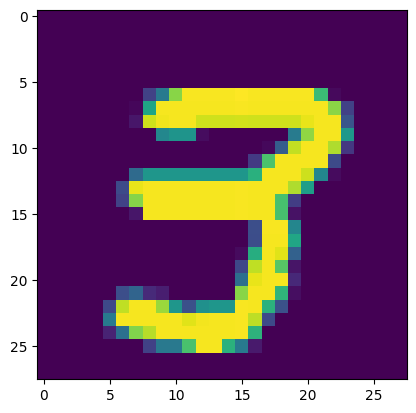

In [101]:
num = np.array(train.iloc[2000,1:]).reshape(28,28)
plt.imshow(num)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

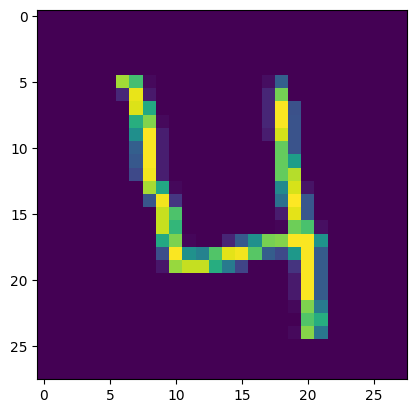

In [102]:
num = np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(num)
plt.show

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [20.,  0.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  2.],
        [20.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  2.,  4.],
        [22.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  3.],
        [22.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  1.],
        [26.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
        [25.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
        [25.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  1.,  

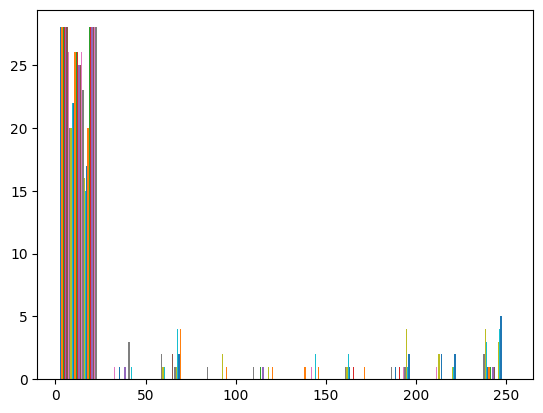

In [103]:
plt.hist(num)

In [104]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

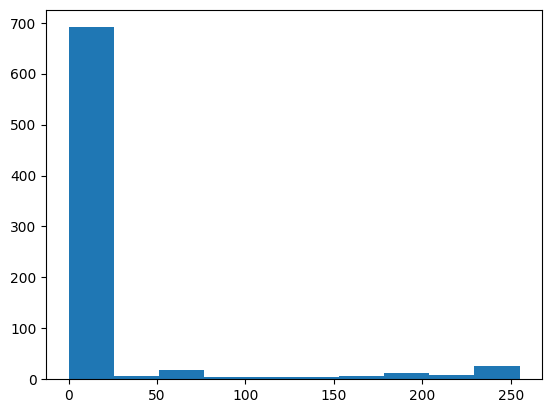

In [105]:
plt.hist(arr)

In [106]:
max(arr)

255

In [107]:
missing_value_count = train.isnull().sum()
missing_value_count

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

**In image dataset it is pointless to find out null values**

# Feature engineering with image dataset?

as this is a image dataset we cannot create new features and add it to our data but we can add various kinds of images to our data such as rotated image , zoomed or sheared

*we can do this using keras library function ImageDataGenerator*

In [108]:
x = np.array(train)
y = np.array(test)

X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)

In [110]:
datagen = ImageDataGenerator(
   rotation_range = 15,
   height_shift_range = 0.1,
   zoom_range = 0.1,
   shear_range = 0.1
)

datagen.fit(X_train)

In [111]:
X_train = X_train.reshape(-1,784)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
Y_train.shape

(42000,)

In [114]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

# Predicting data using KNN Classifier

<function matplotlib.pyplot.show(close=None, block=None)>

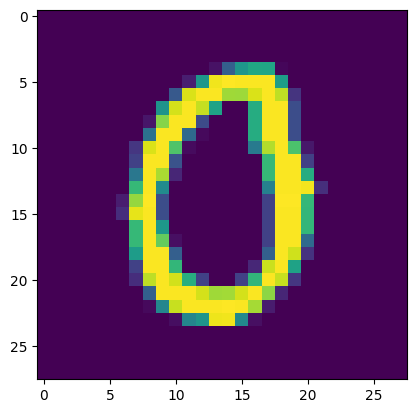

In [115]:
num = np.array(test.iloc[100,:]).reshape(28,28)
plt.imshow(num)
plt.show

In [116]:
int(knn.predict(X_test[100].reshape(1,-1)))

/tmp/ipykernel_34/3305597004.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[100].reshape(1,-1)))


0

<function matplotlib.pyplot.show(close=None, block=None)>

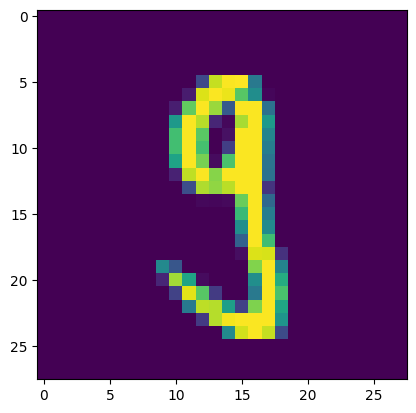

In [117]:
num = np.array(test.iloc[101,:]).reshape(28,28)
plt.imshow(num)
plt.show

In [118]:
int(knn.predict(X_test[101].reshape(1,-1)))

/tmp/ipykernel_34/2832124685.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[101].reshape(1,-1)))


9